<a href="https://colab.research.google.com/github/Dedeepyamaddi/Data-Science-Repo/blob/main/Iris_Flower_Dataset_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK 3:Iris Flower Dataset Classification

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
iris=pd.read_csv('/content/IRIS.csv')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [ ]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Axes: >

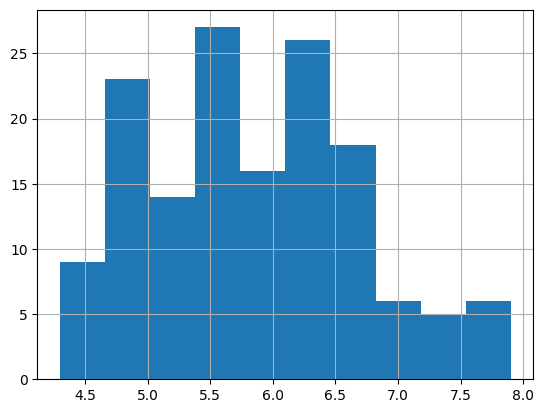

In [ ]:
iris['sepal_length'].hist()

<Axes: >

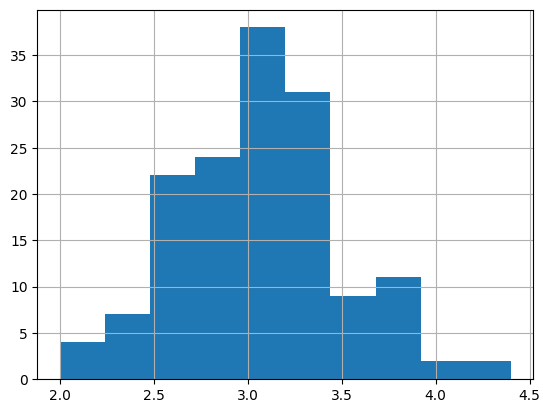

In [ ]:
iris['sepal_width'].hist()

<Axes: >

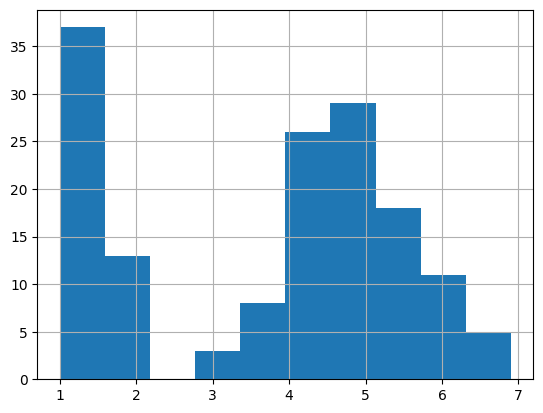

In [ ]:
iris['petal_length'].hist()

<Axes: >

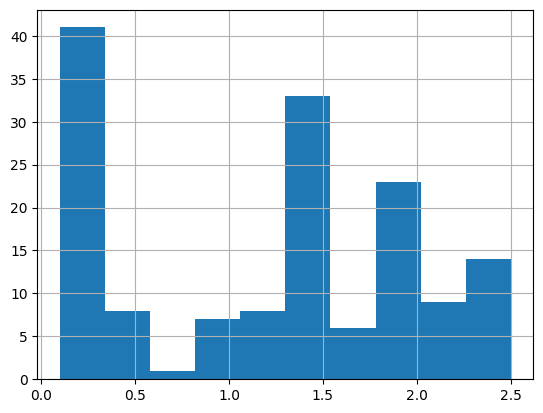

In [ ]:
iris['petal_width'].hist()

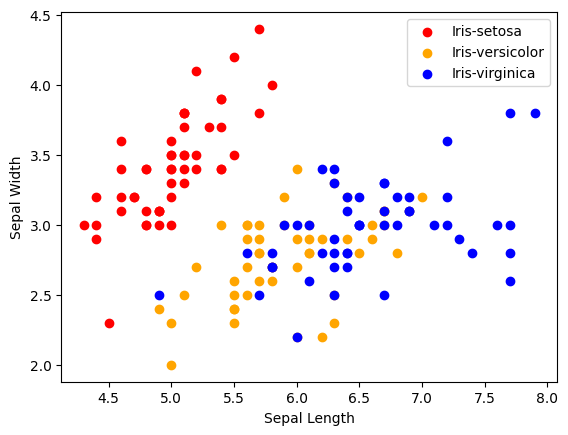

In [ ]:
colors=['red','orange','blue']
Species=['Iris-setosa','Iris-versicolor','Iris-virginica']
for i in range(3):
  x=iris[iris['species']==Species[i]]
  plt.scatter(x['sepal_length'],x['sepal_width'],c=colors[i],label=Species[i])
  plt.xlabel("Sepal Length")
  plt.ylabel("Sepal Width")
  plt.legend()


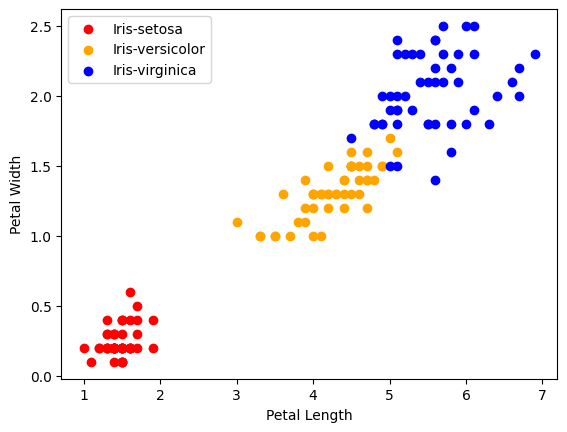

In [ ]:
for i in range(3):
  x=iris[iris['species']==Species[i]]
  plt.scatter(x['petal_length'],x['petal_width'],c=colors[i],label=Species[i])
  plt.xlabel("Petal Length")
  plt.ylabel("Petal Width")
  plt.legend()

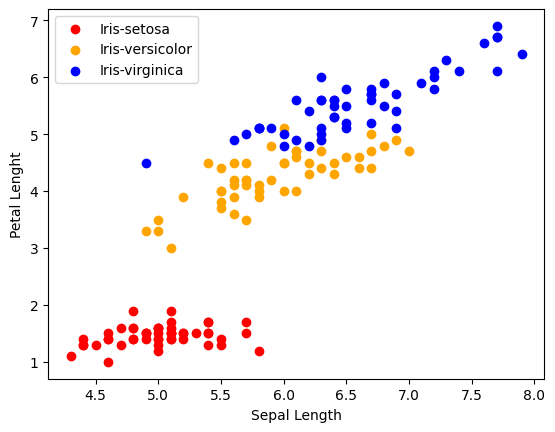

In [ ]:
for i in range(3):
  x=iris[iris['species']==Species[i]]
  plt.scatter(x['sepal_length'],x['petal_length'],c=colors[i],label=Species[i])
  plt.xlabel("Sepal Length")
  plt.ylabel("Petal Lenght")
  plt.legend()

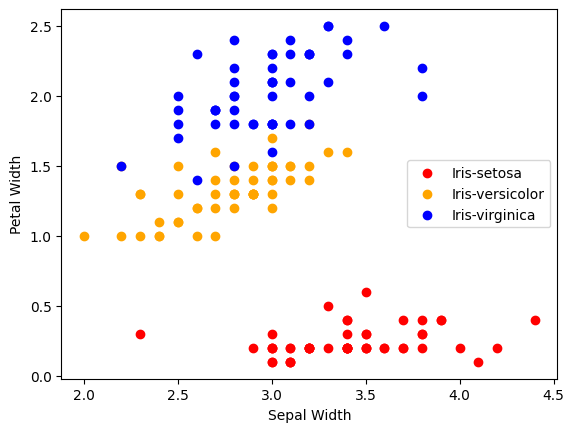

In [ ]:
for i in range(3):
  x=iris[iris['species']==Species[i]]
  plt.scatter(x['sepal_width'],x['petal_width'],c=colors[i],label=Species[i])
  plt.xlabel("Sepal Width")
  plt.ylabel("Petal Width")
  plt.legend()

<ipython-input-16-4b2f496c2046>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=iris.corr()


<Axes: >

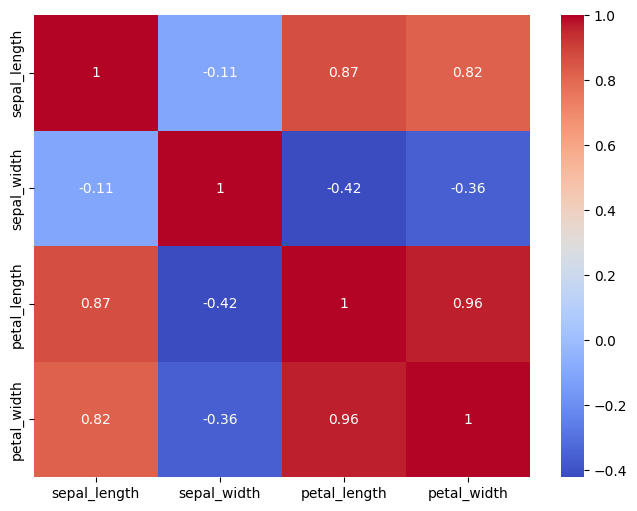

In [ ]:
corr=iris.corr()
fig,ax=plt.subplots(figsize=(8,6))
sns.heatmap(corr,annot=True,ax=ax,cmap='coolwarm')


In [ ]:
le=LabelEncoder()
iris['species']=le.fit_transform(iris['species'])
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
x=iris.drop(columns=['species'])
y=iris['species']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [ ]:
model=LogisticRegression()
model.fit(x_train,y_train)


LogisticRegression()

In [ ]:
print("accuracy: ",model.score(x_test,y_test)*100)

accuracy:  88.88888888888889


In [ ]:
model=KNeighborsClassifier()

In [ ]:
model.fit(x_train,y_train)


DecisionTreeClassifier()

In [ ]:
print("accuracy: ",model.score(x_test,y_test)*100)

accuracy:  88.88888888888889


In [ ]:
model=DecisionTreeClassifier()

In [ ]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
print("Äccuracy:",model.score(x_test,y_test)*100)

Äccuracy: 88.88888888888889
